# Shapefiles on maps

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cartopy
import cartopy.io.shapereader as shpreader

import shapely.geometry

## What is a shapefile?

A shapefile contains spatial information in a particular format and is used commonly in GIS applications. It typically contains information like the polygons describing counties, countries, or other political boundaries; lakes, rivers, or bays; or land and coastline. A shapefile record has a geometry, which contains the points that make up the objects, and attributes, which store information like the name of the record.

Shapefiles are commonly available online through local or federal agencies for geometric data on public lands and waterways.

## Read and examine records from Natural Earth

We saw in the `maps` notebook how easy it is to access shapefiles through Natural Earth and `cartopy`. Here we go into more detail.

We can read in a dataset from Natural Earth with the following lines. 

**Note**
If we didn't re-read this each time this cell was run, we could only run through the records once. Once the states have been iterated over, the pointer is at the end of them and there are none left to show. This is like reading all of the lines of a file and reaching the end.


In [30]:
# how we tell cartopy which data we want, from the list at the end of the maps notebook
shapename = 'admin_1_states_provinces_lakes_shp'

# Set up reader for this file
states_shp = shpreader.natural_earth(category='cultural', resolution='110m', name=shapename)
reader = shpreader.Reader(states_shp)

# Read in the data from the file into the "states" generator which we can iterate/loop over
states = reader.records()

Information about the states is in variable `states` and is a generator. Without going into too much detail about generators, they are used in loops and we can see two ways to access the individual records (or states in this case) in the next few cells.

We can see all of the states by looking at the generator as a list:

In [28]:
list(states)


[]

**Note**

Each time you access the states, you will need to rerun the cell above that reads in the records in the first place.

Or in its natural state, we can step through the records of the generator using `next` after rereading in the records. The following cell shows the first record, which contains a single state.

In [31]:
next(states)

<Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2839de7d30>, {'scalerank': 2, 'featurecla': 'Admin-1 scale rank', 'adm1_code': 'USA-3514', 'diss_me': 3514, 'adm1_cod_1': 'USA-3514', 'iso_3166_2': 'US-MN', 'wikipedia': 'http://en.wikipedia.org/wiki/Minnesota', 'sr_sov_a3': 'US1', 'sr_adm0_a3': 'USA', 'iso_a2': 'US', 'adm0_sr': 1, 'admin0_lab': 2, 'name': 'Minnesota', 'name_alt': 'MN|Minn.', 'name_local': '', 'type': 'State', 'type_en': 'State', 'code_local': 'US32', 'code_hasc': 'US.MN', 'note': '', 'hasc_maybe': '', 'region': 'Midwest', 'region_cod': '', 'region_big': 'West North Central', 'big_code': '', 'provnum_ne': 0, 'gadm_level': 1, 'check_me': 10, 'scaleran_1': 2, 'datarank': 1, 'abbrev': 'Minn.', 'postal': 'MN', 'area_sqkm': 0.0, 'sameascity': -99, 'labelrank': 0, 'featurec_1': 'Admin-1 scale rank', 'admin': 'United States of America', 'name_len': 9, 'mapcolor9': 1, 'mapcolor13': 1}, <fields>>

Now the next.

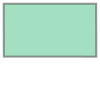

In [45]:
next(states).geometry

We can save one to a variable name so that we can examine it more carefully:

In [33]:
state = next(states)
state

<Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2839de36d8>, {'scalerank': 2, 'featurecla': 'Admin-1 scale rank', 'adm1_code': 'USA-3516', 'diss_me': 3516, 'adm1_cod_1': 'USA-3516', 'iso_3166_2': 'US-ND', 'wikipedia': 'http://en.wikipedia.org/wiki/North_Dakota', 'sr_sov_a3': 'US1', 'sr_adm0_a3': 'USA', 'iso_a2': 'US', 'adm0_sr': 1, 'admin0_lab': 2, 'name': 'North Dakota', 'name_alt': 'ND|N.D.', 'name_local': '', 'type': 'State', 'type_en': 'State', 'code_local': 'US38', 'code_hasc': 'US.ND', 'note': '', 'hasc_maybe': '', 'region': 'Midwest', 'region_cod': '', 'region_big': 'West North Central', 'big_code': '', 'provnum_ne': 0, 'gadm_level': 1, 'check_me': 0, 'scaleran_1': 2, 'datarank': 1, 'abbrev': 'N.D.', 'postal': 'ND', 'area_sqkm': 0.0, 'sameascity': -99, 'labelrank': 0, 'featurec_1': 'Admin-1 scale rank', 'admin': 'United States of America', 'name_len': 12, 'mapcolor9': 1, 'mapcolor13': 1}, <fields>>

We are seeing the attributes of the record, unique to this file, which we can access more specifically as follows:

In [34]:
state.attributes

{'scalerank': 2,
 'featurecla': 'Admin-1 scale rank',
 'adm1_code': 'USA-3516',
 'diss_me': 3516,
 'adm1_cod_1': 'USA-3516',
 'iso_3166_2': 'US-ND',
 'wikipedia': 'http://en.wikipedia.org/wiki/North_Dakota',
 'sr_sov_a3': 'US1',
 'sr_adm0_a3': 'USA',
 'iso_a2': 'US',
 'adm0_sr': 1,
 'admin0_lab': 2,
 'name': 'North Dakota',
 'name_alt': 'ND|N.D.',
 'name_local': '',
 'type': 'State',
 'type_en': 'State',
 'code_local': 'US38',
 'code_hasc': 'US.ND',
 'note': '',
 'hasc_maybe': '',
 'region': 'Midwest',
 'region_cod': '',
 'region_big': 'West North Central',
 'big_code': '',
 'provnum_ne': 0,
 'gadm_level': 1,
 'check_me': 0,
 'scaleran_1': 2,
 'datarank': 1,
 'abbrev': 'N.D.',
 'postal': 'ND',
 'area_sqkm': 0.0,
 'sameascity': -99,
 'labelrank': 0,
 'featurec_1': 'Admin-1 scale rank',
 'admin': 'United States of America',
 'name_len': 12,
 'mapcolor9': 1,
 'mapcolor13': 1}

... and then each attribute individually as in a dictionary:

In [38]:
state.attributes['region']

'Midwest'

We can also access the geometry of the record:

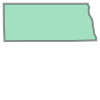

In [39]:
state.geometry

and properties of the geometry like the area and centroid location:

In [46]:
state.geometry.area  # what are the units of this area?

21.804544852980253

In [47]:
state.geometry.centroid.xy  # this is in lon/lat

(array('d', [-100.48470034126994]), array('d', [47.46271462229255]))

### Pull out specific records

Find states that start with "A":

Minnesota
Montana
Missouri
Massachusetts
Mississippi
Maryland
Maine
Michigan


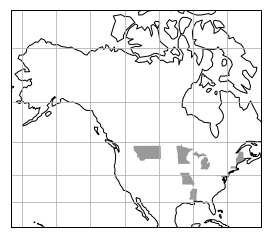

In [51]:
pc = cartopy.crs.PlateCarree()

# how we tell cartopy which data we want, from the list at the end of the maps notebook
shapename = 'admin_1_states_provinces_lakes_shp'

# Set up reader for this file
states_shp = shpreader.natural_earth(category='cultural', resolution='110m', name=shapename)
reader = shpreader.Reader(states_shp)

# Read in the data from the file into the "states" generator which we can iterate/loop over
states = reader.records()

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection=cartopy.crs.Mercator())
ax.set_extent([-170,-60,20,75], pc)

for state in states:
    if state.attributes['name'][0] == 'M':
        print(state.attributes['name'])
        ax.add_geometries([state.geometry], pc,
                          facecolor='k', alpha=0.4)

ax.coastlines()
ax.gridlines()

*How could you change this loop to check for states in a specific region of the country?*

### Transforming geometry between projections

Shapefiles are often in geographic coordinates (lon/lat), and they come out of Natural Earth as lon/lat. 

Here we change a state's projection from PlateCarree (`pc`) to LambertConformal. We use the `project_geometry` method in the projection we want to transform to (`lc` in this case), and input the current projection of the shape into the method (`pc` in this case).

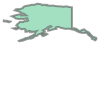

In [52]:
state.geometry  # we can see the shape in PlateCarree

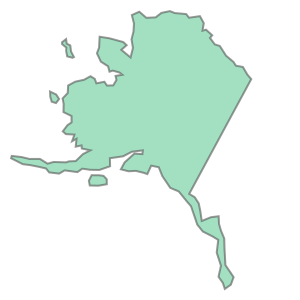

In [54]:
lc = cartopy.crs.LambertConformal()
statelc = lc.project_geometry(state.geometry, pc)
statelc  # this is now the geometry of the record only, without attributes
      # the shape has changed in the new projection

### Great Circle Distance

How do you find an airplane's flight path? The shortest line between two places on earth is not necessarily a straight line in the projection you are using. The shortest distance is called the Great Circle distance and it is the shortest distance between two places on a sphere. 

For example, here is the shortest path between Boston and Tokyo. It is a straight line in this rather globe-like projection because it preserves this property.

![greatcircle](http://web.mit.edu/dsheehan/www/MapsAPIexamples/worldfromspaceBosNrt.jpg)

However, [this link](http://web.mit.edu/dsheehan/www/MapsAPIexamples/gcr.html) shows the flight path in a different projection. Not so straight anymore.


Here are previously-saved latitude and longitude points along the great circle line between the LA and Newark airports (calculated using the `pyproj` package which is great but beyond the scope of this notebook).

In particular, the LA and Newark airports have the following coordinates and are in the first and last elements of the two arrays.

    LAX: 33.9425° N, 118.4081° W
    EWR: 40.6925° N, 74.1686° W

In [56]:
lons = [-118.4081, -116.53656281803954, -114.63494404602989, -112.70342143546311,
        -110.74234511851722, -108.75224911337924, -106.73386144433508, -104.6881124356053,
        -102.6161407277617, -100.51929657411526, -98.3991420049751, -96.25744750245255,
        -94.09618490844686, -91.91751639275596, -89.72377943401308, -87.51746790832203,
        -85.30120953200326, -83.07774005710772, -80.84987476165341, -78.62047790110475,
        -76.39243088444343, -74.1686]
lats = [33.9425, 34.62185468395183, 35.27195983702588, 35.89163680795418, 36.47971217805657,
        37.03502459436787, 37.5564322473648, 38.042820934293715, 38.493112624072936,
        38.9062744137114, 39.281327740305926, 39.61735768834621, 39.9135222108212,
        40.169061066104604, 40.38330426236194, 40.55567979862256, 40.68572049769913,
        40.773069741323866, 40.81748594212188, 40.818845619619054, 40.77714498701483, 40.6925]

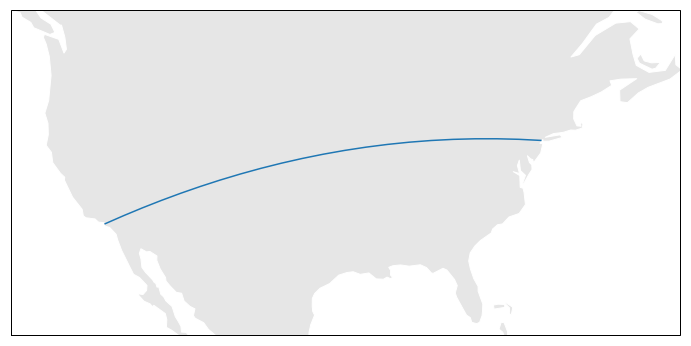

In [57]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection=cartopy.crs.Mercator())
ax.set_extent([-128, -60, 24, 50], cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, facecolor='0.9')
ax.add_feature(cartopy.feature.OCEAN, facecolor='w')

# add end points
ax.plot(lons, lats, transform=cartopy.crs.PlateCarree())


### Make your own Shape from points

You can create your own Shape geometry from coordinate locations or x,y points, so that you can interact with it in a similar manner as from a shapefile. Once you have a Shape, you can change projections and look at geometric properties of the Shape, as we did above for a single state.

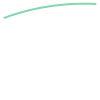

In [60]:
# use lons and lats of the great circle path from above
line = shapely.geometry.LineString(zip(lons, lats))
line

We can look at properties like the length of the line, though keep in mind that any properties will be calculated in the projection being used. In this case, the line is in geographic coordinates, so the length is also in geographic coordinates, not in meters.

In [63]:
lc.project_geometry(line, pc).length

3930751.2491653725

---
### *Exercise*

> Convert the line between these two cities to another projection, calculate the length, and compare with the actual distance. Which projection should you use for this calculation and why? 

---

Other [shape options](https://toblerity.org/shapely/shapely.geometry.html) include:

* Polygon
* LineString
* MultiLineString
* MultiPoint
* MultiPolygon
* Point

and some basic information about working with shapes separately from maps and shapefiles is available in [notebook ST_shapes.ipynb](ST_shapes.ipynb).

## Reading your own shapes and using `cartopy`

You can read in shapefiles outside of the Natural Earth dataset and use them on maps with `cartopy`. Here we look at shipping lanes in the northwest Gulf of Mexico. You can get to the shapes or polygons themselves two different ways using `cartopy`. The first uses the `feature` interface that we've been using (with `add_feature`), but limits our ability to access attributes of the files. The second gives more access.


### 1st approach for using a generic shapefile:

We start with a map:

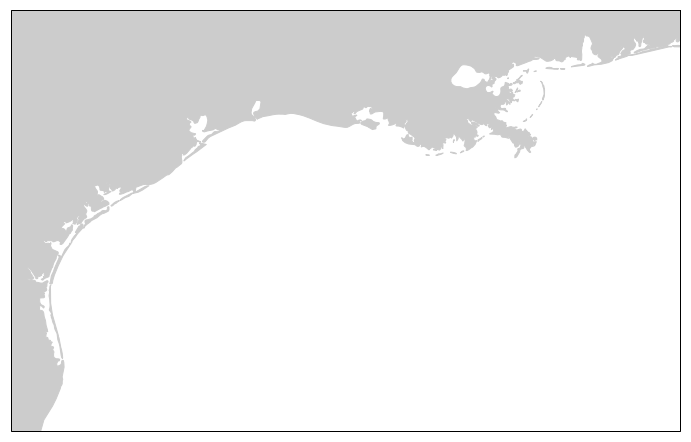

In [76]:
proj = cartopy.crs.LambertConformal()
pc = cartopy.crs.PlateCarree()
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face')

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection=proj)
ax.set_extent([-98, -87, 25, 31], pc)
ax.add_feature(land_10m, facecolor='0.8')

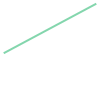

In [65]:
fname = '../data/fairway/fairway.shp'
foo = shpreader.Reader(fname).geometries()
next(foo)

We then set up to read in shipping lane data, which is in the `data` directory:

In [77]:
fname = '../data/fairway/fairway.shp'
shipping_lanes = cartopy.feature.ShapelyFeature(shpreader.Reader(fname).geometries(),
                                cartopy.crs.PlateCarree(), facecolor='none')

Now we can just add the shipping lanes onto our map!

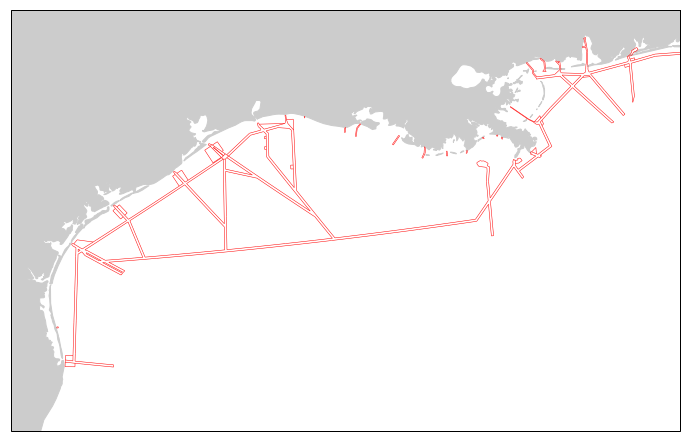

In [78]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection=proj)
ax.set_extent([-98, -87, 25, 31], cartopy.crs.PlateCarree())
ax.add_feature(land_10m, facecolor='0.8')

# shipping lanes
ax.add_feature(shipping_lanes, edgecolor='r', linewidth=0.5)

### 2nd approach for using a generic shapefile

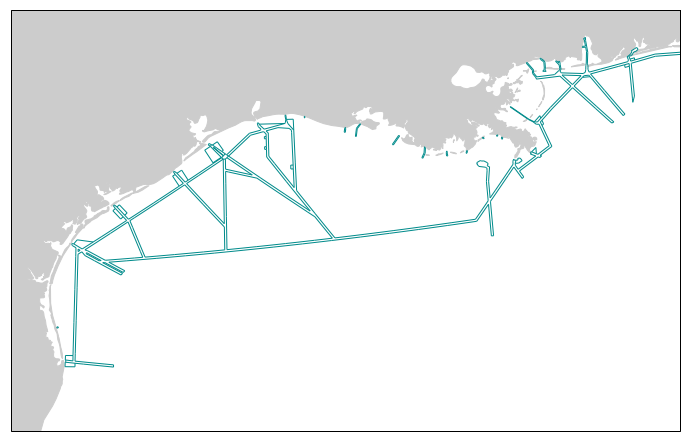

In [79]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection=proj)
ax.set_extent([-98, -87, 25, 31], cartopy.crs.PlateCarree())
ax.add_feature(land_10m, facecolor='0.8')

fname = '../data/fairway/fairway.shp'
ax.add_geometries(cartopy.io.shapereader.Reader(fname).geometries(),
                  pc, edgecolor='darkcyan')


## States Flown Over

Consider the following: 

What states do you travel over when you fly from LA (airport code LAX) to NYC (airport code EWR)?

First, a plot of the problem:

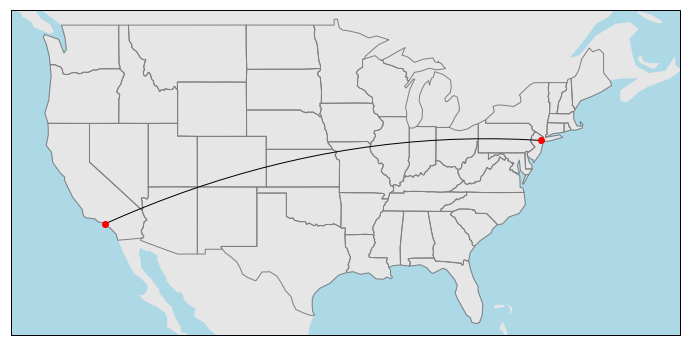

In [88]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection=cartopy.crs.Mercator())
ax.set_extent([-128, -60, 24, 50], cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, facecolor='0.9')
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')

# add states
# can plot states like this, but doesn't allow access to metadata
shapename = 'admin_1_states_provinces_lakes_shp'
states = cartopy.feature.NaturalEarthFeature(category='cultural', scale='110m', facecolor='none', name=shapename)
ax.add_feature(states, edgecolor='gray')

# # add end points
ax.plot([lons[0], lons[-1]], [lats[0], lats[-1]], 'ro', transform=pc)

# add the flight path as a shape
ax.add_geometries([line,], pc, facecolor='none', edgecolor='k')
# ax.plot(lons, lats, '-k', transform=pc)

### Shape intersections

An easy way to find what states the flight path intersects is looking for intersections of the Shapes.

['Arizona', 'Arizona', 'California', 'California', 'Colorado', 'Colorado', 'Nevada', 'Nevada', 'New Mexico', 'New Mexico', 'Utah', 'Iowa', 'Kansas', 'Kansas', 'Missouri', 'Missouri', 'Nebraska', 'Connecticut', 'Illinois', 'Illinois', 'Indiana', 'Indiana', 'Ohio', 'Ohio', 'West Virginia', 'Delaware', 'New Jersey', 'New Jersey', 'New York', 'Pennsylvania', 'Pennsylvania', 'Michigan']


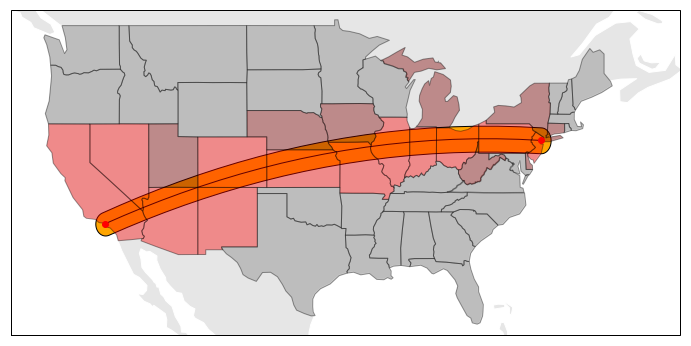

In [96]:
# Set up reader for this file
states_shp = shpreader.natural_earth(category='cultural', resolution='110m', name=shapename)
reader = shpreader.Reader(states_shp)

# Read in the data from the file into the "states" generator which we can iterate over
states = reader.records()

# Note that if we didn't re-read this each time this cell was run, we could only run it once.
# Once the states have been iterated over, the pointer is at the end of them and there are
# none left to show. This is like reading all of the lines of a file and reaching the end.

# Remake map here
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection=cartopy.crs.Mercator())
ax.set_extent([-128, -60, 24, 50], cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, facecolor='0.9')
ax.add_feature(cartopy.feature.OCEAN, facecolor='w')

# add end points
ax.plot([lons[0], lons[-1]], [lats[0], lats[-1]], 'ro', transform=pc)

# add the flight path as a shape
ax.add_geometries([line.buffer(1.0),], pc, facecolor='orange', edgecolor='k')
ax.add_geometries([line], pc, facecolor='none', edgecolor='k')

# Loop through states and see if they intersect flight path
# deal with shapes differently if want to dig into them more

visible_states = []  # initialize for storing states

for state in states:
    # pick a default color for the land with a black outline,
    # this will change if the flight intersects with a state
    facecolor = '0.5'
    edgecolor = 'black'

    if state.geometry.intersects(line.buffer(1.0)):
        facecolor = 'maroon'
        # also save to list if intersects
        visible_states.append(state.attributes['name'])

    if state.geometry.intersects(line):
        facecolor = 'red'
        # also save to list if intersects
        visible_states.append(state.attributes['name'])

    ax.add_geometries([state.geometry,], pc,
                      facecolor=facecolor, edgecolor=edgecolor, alpha=0.4)

print(visible_states)

---
### *Exercise*

> _What additional states could a passenger in this airplane see? Assume he or she can see 100km from the airplane's position, on either side of the plane._

> Make a buffer away from the flight path.
>  * What should the units of the projection be? 
>  * First you will need to convert projections. 
>  * _What is a good choice for a projection and why?_
>  * Once you set up your buffer, add it to the map.

---

---
### *Exercise (continued)*

> _What additional states could a passenger in this airplane see? Assume he or she can see 100km from the airplane's position, on either side of the plane._

> 
> What states are visible?
>  * Save the names of the visible states and print them out 
>  * Color differently on the map the states that are visible from the plane but that aren't actually flown over.

---

---
### *Exercise (continued)*

> Find the length of the flight track and area of the flight buffer region.

> 
> What projection should we use to get a good approximation of the real values?
>  * Compare your length with the actual distance
>  * Compare your buffer region with an appropriate estimation

---